In [ ]:
# Import packages/libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# Config Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Membaca data CSV ke dalam dataframe pandas
df = pd.read_csv('/content/drive/MyDrive/DSC25/GoldChallenge/dataset.csv', encoding='latin-1')
kamusalay = pd.read_csv('/content/drive/MyDrive/DSC25/GoldChallenge/new_kamusalay.csv', header=None, names=['alay_word', 'normal_word'], encoding='latin-1')
abusive_words = pd.read_csv('/content/drive/MyDrive/DSC25/GoldChallenge/abusive.csv', encoding='latin-1')


In [ ]:
# Melihat Struktur dan Statistik Dataset
print("Struktur dataset:")
df.info()  # Menampilkan informasi dataset
df.describe()  # Menampilkan statistik deskriptif dataset

Struktur dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


from matplotlib import pyplot as plt
_df_0['HS'].plot(kind='hist', bins=20, title='HS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Abusive'].plot(kind='hist', bins=20, title='Abusive')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['HS_Individual'].plot(kind='hist', bins=20, title='HS_Individual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['HS_Group'].plot(kind='hist', bins=20, title='HS_Group')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='HS', y='Abusive', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Abusive', y='HS_Individual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='HS_Individual', y='HS_Group', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='HS_Group', y='HS_Religion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['HS'].plot(kind='line', figsize=(8, 4), title='HS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Abusive'].plot(kind='line', figsize=(8, 4), title='Abusive')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['HS_Individual'].plot(kind='line', figsize=(8, 4), title='HS_Individual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['HS_Group'].plot(kind='line', figsize=(8, 4), title='HS_Group')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Melihat Struktur dan Statistik Kamusalay
print("Struktur kamusalay:")
kamusalay.info()  # Menampilkan informasi kamusalay
kamusalay.describe()  # Menampilkan statistik deskriptif kamusalay

Struktur kamusalay:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15167 entries, 0 to 15166
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   alay_word    15167 non-null  object
 1   normal_word  15167 non-null  object
dtypes: object(2)
memory usage: 237.1+ KB


,alay_word,normal_word
count,15167,15167
unique,15167,8639
top,anakjakartaasikasik,wkwk
freq,1,100


In [ ]:
# Melihat Struktur dan Statistik Abusive
print("Struktur abusive_words:")
abusive_words.info()  # Menampilkan informasi abusive
abusive_words.describe()  # Menampilkan statistik deskriptif abusive

Struktur abusive_words:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ABUSIVE  125 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


,ABUSIVE
count,125
unique,125
top,alay
freq,1


In [ ]:
# Fungsi untuk cleansing teks
def cleansing_text(text, kamusalay, abusive_words):
    # Ubah teks menjadi huruf kecil
    text = text.lower()

    # Hapus karakter yang tidak perlu (misalnya karakter escape \n, \t, dll.)
    text = re.sub(r'\\x[\da-fA-F]{2}', '', text)  # Hapus karakter seperti \xf0\x9f dll.
    text = re.sub(r'\\n|\\t|[\t]', ' ', text)  # Hapus newline dan tab
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih

    # Ganti kata alay dengan kata normal
    for i, row in kamusalay.iterrows():
        text = re.sub(r'\b{}\b'.format(re.escape(row['alay_word'])), row['normal_word'], text, flags=re.IGNORECASE)

    # Hapus kata-kata abusive
    for word in abusive_words['ABUSIVE']:
        text = re.sub(r'\b{}\b'.format(re.escape(word)), '', text, flags=re.IGNORECASE)

    return text

# Cleansing kolom 'Tweet'
df['cleaned_tweet'] = df['Tweet'].apply(lambda x: cleansing_text(x, kamusalay, abusive_words))

# Tampilkan beberapa baris setelah cleansing
print("\nDataset setelah cleansing:")
print(df[['Tweet', 'cleaned_tweet']].head())


Dataset setelah cleansing:
                                               Tweet  \
0  - disaat semua cowok berusaha melacak perhatia...   
1  RT USER: USER siapa yang telat ngasih tau elu?...   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   
4  USER USER Kaum cebong kapir udah keliatan dong...   

                                       cleaned_tweet  
0  - di saat semua cowok berusaha melacak perhati...  
1  rt pengguna: pengguna siapa yang telat memberi...  
2  41. kadang aku berpikir, kenapa aku tetap perc...  
3  pengguna pengguna aku itu aku ku tau matamu  t...  
4  pengguna pengguna kaum   sudah kelihatan dongo...  


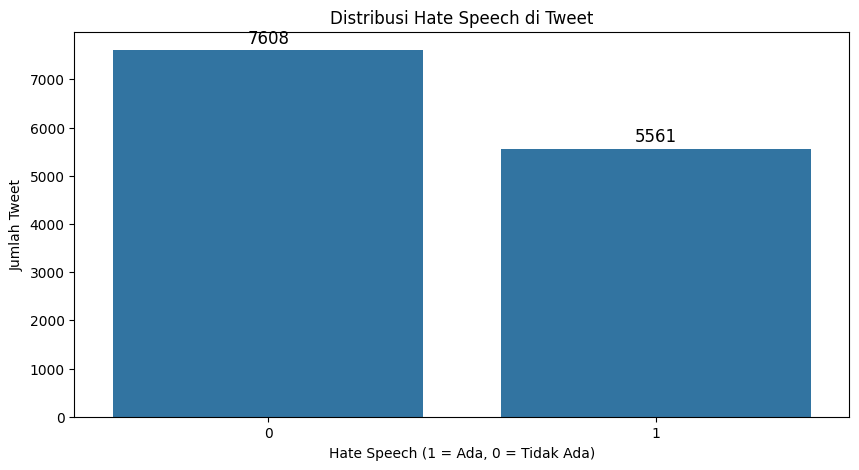

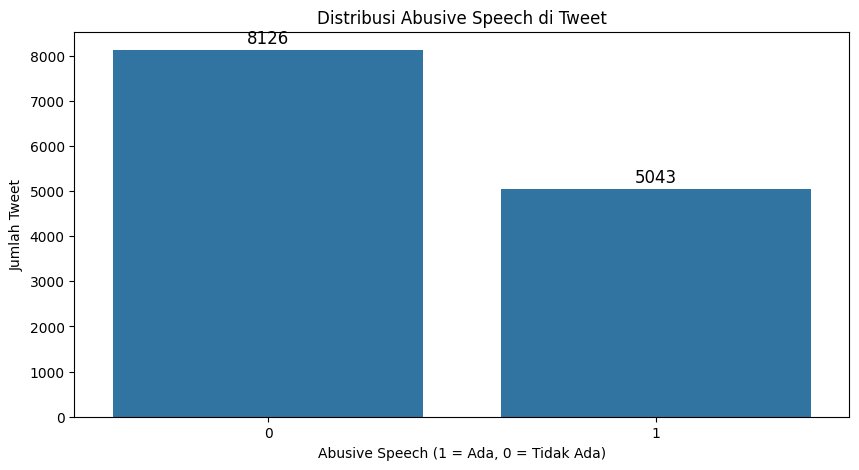

In [ ]:
# Visualisasi Distribusi Hate Speech dan Abusive Speech
# Plot distribusi Hate Speech
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='HS', data=df)
plt.title('Distribusi Hate Speech di Tweet')
plt.xlabel('Hate Speech (1 = Ada, 0 = Tidak Ada)')
plt.ylabel('Jumlah Tweet')

# Menambahkan nilai di atas bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Plot distribusi Abusive Speech
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Abusive', data=df)
plt.title('Distribusi Abusive Speech di Tweet')
plt.xlabel('Abusive Speech (1 = Ada, 0 = Tidak Ada)')
plt.ylabel('Jumlah Tweet')

# Menambahkan nilai di atas bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# **Kesimpulan & Insight**

## **Distribusi Hate Speech dan Abusive Speech**


> Hate Speech (HS): Dari total 13.169 tweet, sekitar 42,2% mengandung hate speech (HS = 1), sementara 57,8% tidak mengandung hate speech (HS = 0). **Jumlah tweet yang tidak mengandung hate speech lebih besar daripada yang mengandung hate speech** (7608 tidak mengandung hate speech vs. 5561 mengandung hate speech).


> Abusive Speech: 38,3% dari tweet mengandung abusive speech (Abusive = 1), sementara 61,7% tidak mengandung abusive speech (Abusive = 0). **Jumlah tweet yang mengandung abusive speech lebih sedikit daripada yang tidak mengandung abusive speech** (8126 tidak mengandung abusive speech vs. 5043 mengandung abusive speech).



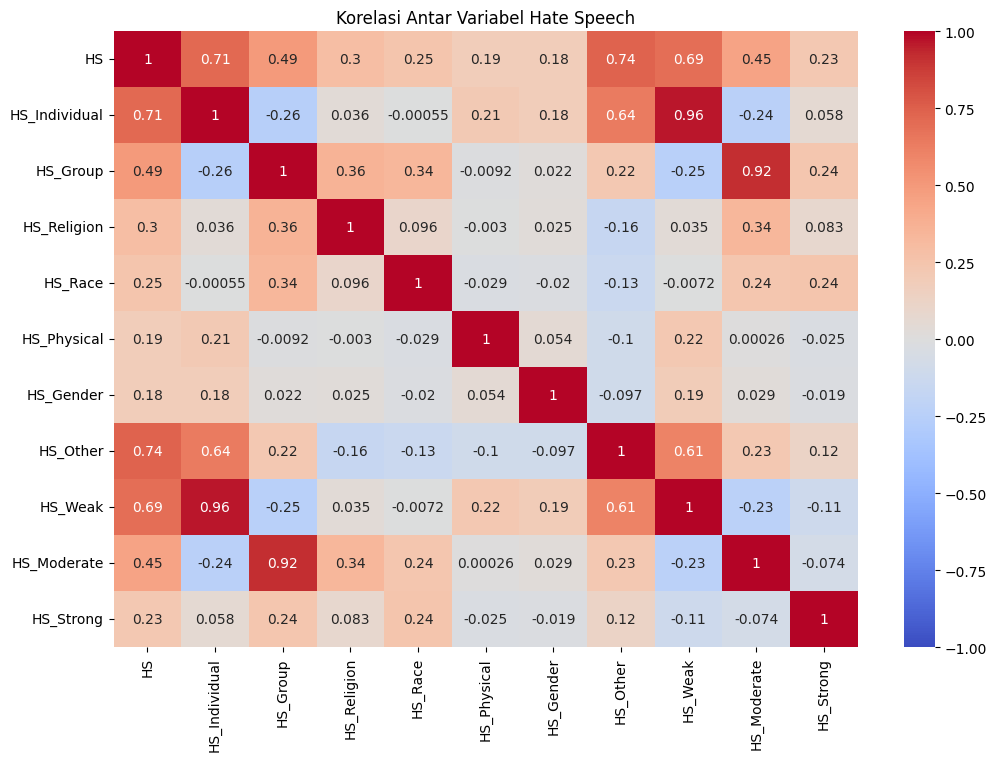

In [ ]:
# Visualisasi Korelasi Antar Variabel Hate Speech (Heatmap dari Seaborn)
# Pilih kolom-kolom yang terkait dengan hate speech
hs_columns = ['HS', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']

# Hitung korelasi
correlation_matrix = df[hs_columns].corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Antar Variabel Hate Speech')
plt.show()


# **Kesimpulan & Insight**

## **Korelasi Antar Variabel Hate Speech**



> Korelasi Tinggi: Variabel HS_Weak dan HS_Individual menunjukkan korelasi yang sangat tinggi (0,96), yang menunjukkan bahwa tweet yang mengandung hate speech lemah (HS_Weak = 1) sering kali juga dikategorikan sebagai hate speech terhadap individu (HS_Individual = 1).



> Korelasi Sedang: Variabel HS dan HS_Other memiliki korelasi sedang (0,74), yang menunjukkan bahwa jika sebuah tweet mengandung hate speech secara umum (HS = 1), sering kali juga dikategorikan sebagai hate speech dalam kategori lain yang tidak spesifik (HS_Other = 1).


> Korelasi Negatif: Korelasi negatif ditemukan antara HS_Weak dan HS_Group (-0,25), yang menunjukkan bahwa hate speech terhadap kelompok (HS_Group = 1) tidak cenderung dikategorikan sebagai hate speech yang lemah.







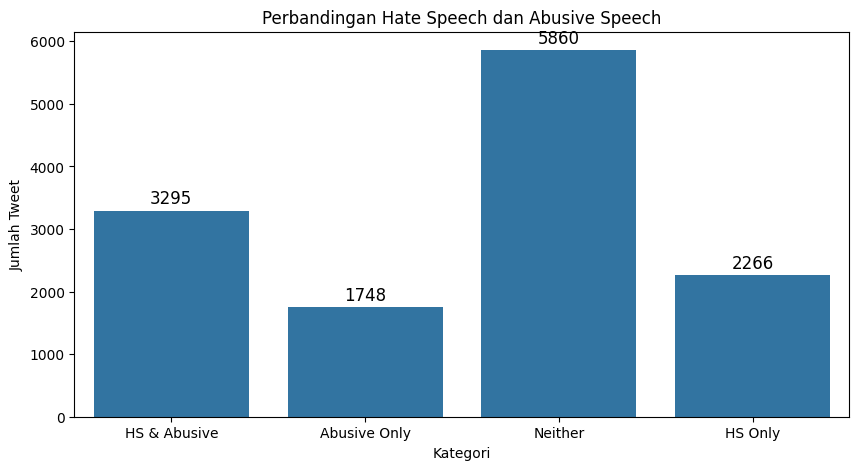

In [ ]:
# Visualisasi Perbandingan Hate Speech dan Abusive Speech
# Untuk melihat adanya tumpang tindih antara tweet yang mengandung hate speech dan abusive speech

# Buat kategori baru untuk kombinasi hate speech dan abusive speech
df['HS_Abusive'] = df.apply(lambda row: 'HS & Abusive' if row['HS'] == 1 and row['Abusive'] == 1
                                      else 'HS Only' if row['HS'] == 1
                                      else 'Abusive Only' if row['Abusive'] == 1
                                      else 'Neither', axis=1)

# Plot distribusi kombinasi HS dan Abusive dengan annotation nilai
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='HS_Abusive', data=df)
plt.title('Perbandingan Hate Speech dan Abusive Speech')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Tweet')

# Menambahkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# **Kesimpulan & Insight**

## **Perbandingan Hate Speech dan Abusive Speech**

*   3295 tweet mengandung both hate speech dan abusive speech.
*   1748 tweet hanya mengandung abusive speech tanpa hate speech.
*   2266 tweet hanya mengandung hate speech tanpa abusive speech.
*   5860 tweet tidak mengandung hate speech maupun abusive speech.


> Dari data ini, tampak bahwa sebagian besar tweet yang mengandung abusive speech juga mengandung hate speech. Namun, ada juga tweet yang mengandung salah satu dari hate speech atau abusive speech secara eksklusif.



In [ ]:
# Metode Statistika untuk Menjawab Latar Belakang Permasalahan
# Statistik deskriptif untuk menghitung mean, median, dan standard deviation dari masing-masing kategori hate speech
print(df[hs_columns].describe())

                 HS  HS_Individual      HS_Group   HS_Religion       HS_Race  \
count  13169.000000   13169.000000  13169.000000  13169.000000  13169.000000   
mean       0.422280       0.271471      0.150809      0.060217      0.042980   
std        0.493941       0.444735      0.357876      0.237898      0.202819   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.000000       0.000000      0.000000      0.000000      0.000000   
50%        0.000000       0.000000      0.000000      0.000000      0.000000   
75%        1.000000       1.000000      0.000000      0.000000      0.000000   
max        1.000000       1.000000      1.000000      1.000000      1.000000   

        HS_Physical     HS_Gender      HS_Other       HS_Weak   HS_Moderate  \
count  13169.000000  13169.000000  13169.000000  13169.000000  13169.000000   
mean       0.024527      0.023236      0.284000      0.256891      0.129471   
std        0.154685      0.150659      0.4


# **Kesimpulan & Rekomendasi**

> Data menunjukkan adanya distribusi signifikan antara hate speech dan abusive speech, dengan tumpang tindih yang besar antara keduanya.

> Korelasi antar variabel hate speech menunjukkan beberapa hubungan yang kuat, terutama antara hate speech yang lebih lemah dan yang ditujukan pada individu. Analisis ini dapat membantu dalam mengidentifikasi dan mengatasi masalah hate speech dan abusive speech di media sosial lebih efektif.

> Mengingat beberapa kategori hate speech memiliki korelasi rendah dengan yang lain, mungkin ada faktor eksternal yang mempengaruhi distribusi ini, seperti situasi sosial atau politik yang bisa berdampak pada distribusi hate speech di media sosial.

> Analisis lebih lanjut bisa digunakan oleh platform media sosial Tweet ini untuk mengembangkan alat deteksi otomatis yang lebih baik yang memperhatikan korelasi antara jenis hate speech dan abusive speech. Ini dapat meningkatkan akurasi dalam mengidentifikasi konten berbahaya. Karena platform media sosial ini juga memiliki tanggung jawab moral terhadap kesehatan mental penggunanya.



